# Example Tidal Heating

The following example applies BHPwave to the modified tidal heating setup of https://arxiv.org/pdf/1910.07841. Please cite that reference if this is of interest to you. 

Aside from BHPWave, LISATools will be used for part of the example

we start by loading useful modules. lisatools or other non-standard modules aside from bhpwave will only be imported later as needed.

In [1]:
#useful constants
from bhpwave.constants import *

#Geodesic motion
from bhpwave.trajectory.geodesic import *

#adiabatic inspiral
from bhpwave.trajectory.inspiral import InspiralGenerator, TrajectoryData, Inspiral

#waveform generation
from bhpwave.waveform import KerrCircularWaveform, KerrWaveform, KerrFrequencyWaveform

#useful standard python libraries
import matplotlib.pyplot as plt
import numpy as np
import time
import os

ModuleNotFoundError: No module named 'bhpwaveformcy'

## Evolution of the orbital radius FIG1

the deviation parameter is taken to be 0 as in figure 1 of https://arxiv.org/pdf/1910.07841

In [2]:
path_to_file = os.path.abspath("")
path = path_to_file + "/data/trajectory.txt"
path

'/home/user496/Documents/work/post-PHD_2/bhpwave_Nasipak_sprint/bhpwave/data/trajectory.txt'

In [3]:
trajdata_fig1=TrajectoryData(path, dealloc_flag=False)

In [4]:
inspiral_gen_fig1 = InspiralGenerator(trajectory_data=trajdata_fig1)
Mfig1=10**6
mufig1=30

a998=0.998
a8=0.8
a5=0.5
a3=0.3

p0fig1=10
dt = 10.0  # time steps in seconds
T = 1.5  # waveform duration in years

#
#'''
start = time.time()
inspiral_fig998=inspiral_gen_fig1(Mfig1,mufig1,a998,p0fig1,dt,T)
inspiral_fig8=inspiral_gen_fig1(Mfig1,mufig1,a8,p0fig1,dt,T)
inspiral_fig5=inspiral_gen_fig1(Mfig1,mufig1,a5,p0fig1,dt,T)
inspiral_fig3=inspiral_gen_fig1(Mfig1,mufig1,a3,p0fig1,dt,T)
end = time.time()
print(end - start)
#'''

0.5549235343933105


In [5]:
print(inspiral_fig998.massratio)
print(inspiral_fig998.spin)
#print(inspiral.a)
print(inspiral_fig998.initialradius)
print(inspiral_fig998.dt)
print(inspiral_fig998.time[-1]/60./60./24.)
print(Modot_GC1_to_S*Mfig1)

3e-05
0.998
10.0
2.030254466649337
98.62734166331943
4.925490949173312


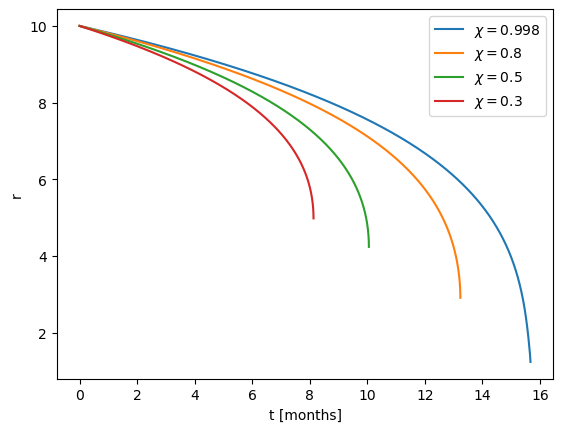

In [6]:
#remark output time in solar masses apparently
ii=0
labellist=[r'$\chi = 0.998$',r'$\chi = 0.8$',r'$\chi = 0.5$',r'$\chi = 0.3$']
ax = plt.gca()
for insp in [inspiral_fig998,inspiral_fig8,inspiral_fig5,inspiral_fig3]:

    itime=insp.time
    iradius=insp.radius
    
    ax.plot(Modot_GC1_to_S*Mfig1*itime/60./60./24./31.,iradius,label=labellist[ii])
    plt.xlabel("t [months]")
    plt.ylabel("r")
    ii=ii+1
ax.legend()
plt.show()

In [7]:
#to compare do the same with modification
path = path_to_file + "/data/trajectoryC1000000ppm.txt"

trajdata_fig1=TrajectoryData(path, dealloc_flag=False)

inspiral_gen_fig1 = InspiralGenerator(trajectory_data=trajdata_fig1)
#
#'''
start = time.time()
inspiral_fig998=inspiral_gen_fig1(Mfig1,mufig1,a998,p0fig1,dt,T)
inspiral_fig8=inspiral_gen_fig1(Mfig1,mufig1,a8,p0fig1,dt,T)
inspiral_fig5=inspiral_gen_fig1(Mfig1,mufig1,a5,p0fig1,dt,T)
inspiral_fig3=inspiral_gen_fig1(Mfig1,mufig1,a3,p0fig1,dt,T)
end = time.time()
print(end - start)
#'''

0.6704223155975342


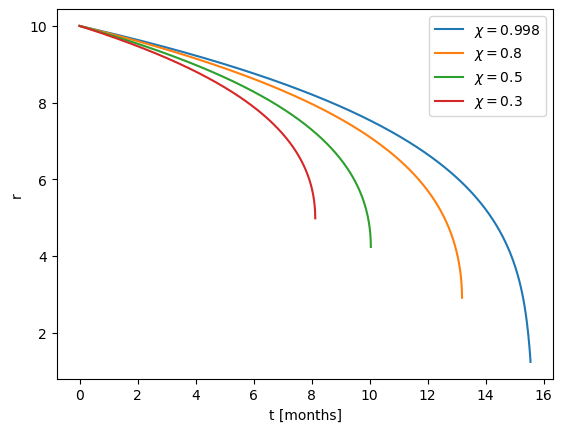

In [8]:
#remark output time in solar masses apparently
ii=0
labellist=[r'$\chi = 0.998$',r'$\chi = 0.8$',r'$\chi = 0.5$',r'$\chi = 0.3$']
ax = plt.gca()
for insp in [inspiral_fig998,inspiral_fig8,inspiral_fig5,inspiral_fig3]:

    itime=insp.time
    iradius=insp.radius
    
    ax.plot(Modot_GC1_to_S*Mfig1*itime/60./60./24./31.,iradius,label=labellist[ii])
    plt.xlabel("t [months]")
    plt.ylabel("r")
    ii=ii+1
ax.legend()
plt.show()

## Evolution of the phase difference FIG2

the deviation parameter is taken to be 1 compared to 0 as in figures 2 of https://arxiv.org/pdf/1910.07841

In [9]:
path_to_file = os.path.abspath("")
pathmod = path_to_file + "/data/trajectoryC1000000ppm.txt"
pathGR = path_to_file + "/data/trajectory.txt"

trajdata_GR=TrajectoryData(pathGR, dealloc_flag=False)
trajdata_mod=TrajectoryData(pathmod, dealloc_flag=False)

In [10]:
M=10**6
mu=30
p0=10
a998=0.998
a8=0.8
a5=0.5
a3=0.3
dt = 10.0  # time steps in seconds
T = 1.5  # waveform duration in years

In [11]:
inspiral_gen_GR = InspiralGenerator(trajectory_data=trajdata_GR)
inspiral_gen_mod = InspiralGenerator(trajectory_data=trajdata_mod)

In [12]:
#'''
start = time.time()
inspiral_fig998=inspiral_gen_GR(M,mu,a998,p0,dt,T)
inspiral_fig8=inspiral_gen_GR(M,mu,a8,p0,dt,T)
inspiral_fig5=inspiral_gen_GR(M,mufig1,a5,p0,dt,T)
inspiral_fig3=inspiral_gen_GR(M,mu,a3,p0,dt,T)
end = time.time()
print(end - start)
#'''

0.5338189601898193


In [13]:
#'''
start = time.time()
inspiral_fig998_mod=inspiral_gen_mod(M,mu,a998,p0,dt,T)
inspiral_fig8_mod=inspiral_gen_mod(M,mu,a8,p0,dt,T)
inspiral_fig5_mod=inspiral_gen_mod(M,mufig1,a5,p0,dt,T)
inspiral_fig3_mod=inspiral_gen_mod(M,mu,a3,p0,dt,T)
end = time.time()
print(end - start)
#'''

0.5852587223052979


(0.0, 0.0)
(0.0, 0.0)
(4197210, 4164933)


Text(0, 0.5, '$|\\delta \\phi|$')

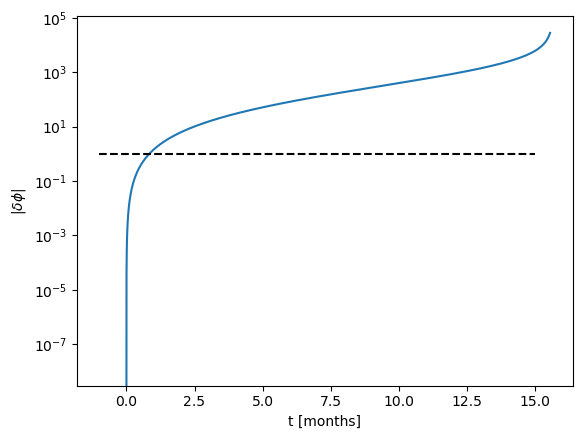

In [14]:
#first just one to see it work
inspgr=inspiral_fig998
inspmod=inspiral_fig998_mod

itime=inspgr.time
itimemod=inspmod.time

iphase=inspgr.phase
iphasemod=inspmod.phase

print((itime[0],itimemod[0]))
print((iphase[0],iphasemod[0]))
print((len(itime),len(itimemod)))
imax=min(len(itime),len(itimemod))
dphase=2*np.abs(inspgr.phase[:imax]-inspmod.phase[:imax])

plt.semilogy(Modot_GC1_to_S*Mfig1*itime[:imax]/60./60./24./31.,dphase)
plt.hlines(1, -1, 15,colors='black',linestyles='dashed')
plt.xlabel("t [months]")
plt.ylabel(r"$|\delta \phi|$")

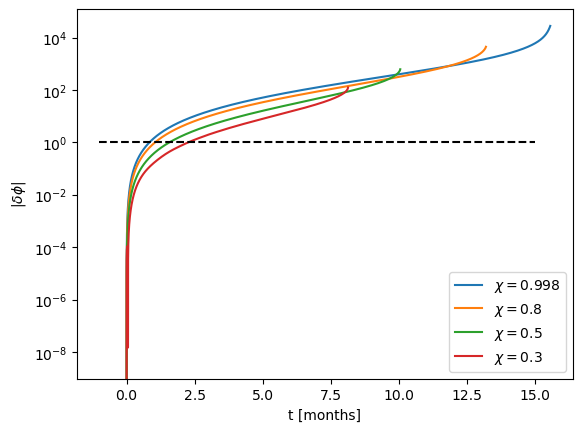

In [15]:
#assume something is still not great in the interpolation
labellist=[r'$\chi = 0.998$',r'$\chi = 0.8$',r'$\chi = 0.5$',r'$\chi = 0.3$']
insplist=[inspiral_fig998,inspiral_fig8,inspiral_fig5,inspiral_fig3]
insplistmod=[inspiral_fig998_mod,inspiral_fig8_mod,inspiral_fig5_mod,inspiral_fig3_mod]
ax = plt.gca()
for ii in range(len(insplist)):
    inspgr=insplist[ii]
    inspmod=insplistmod[ii]

    
    itime=inspgr.time
    itimemod=inspmod.time

    iphase=inspgr.phase
    iphasemod=inspmod.phase

    imax=min(len(itime),len(itimemod))
    dphase=2*np.abs(inspgr.phase[:imax]-inspmod.phase[:imax])
    
    plt.semilogy(Modot_GC1_to_S*Mfig1*itime[:imax]/60./60./24./31.,dphase,label=labellist[ii])
    plt.xlabel("t [months]")
    plt.ylabel(r"$|\delta \phi|$")
plt.hlines(1, -1, 15,colors='black',linestyles='dashed')
ax.legend()
plt.show()

In [16]:
def deltaphifun(fileend,M,mu,a,p0,dt,T):
    pathGR = path_to_file + "/data/trajectory.txt"
    trajdata_GR=TrajectoryData(pathGR, dealloc_flag=False)

    
    pathmod = path_to_file + fileend
    trajdata_mod=TrajectoryData(pathmod, dealloc_flag=False)
    
    inspiral_gen_GR = InspiralGenerator(trajectory_data=trajdata_GR)
    inspiral_gen_mod = InspiralGenerator(trajectory_data=trajdata_mod)
    
    insmod=inspiral_gen_mod(M,mu,a,p0,dt,T)
    insgr=inspiral_gen_GR(M,mu,a,p0,dt,T)
    
    iphase=insgr.phase
    iphasemod=insmod.phase

    #gravitational wave phase
    return 2*(iphase[-1]-iphasemod[-1])

In [17]:
deltaphifun("/data/trajectoryC1000000ppm.txt",M,mu,a998,p0,dt,T)*mu/M

0.36504134062285887

In [18]:
modfiles=["/data/trajectoryC1ppm.txt","/data/trajectoryC100ppm.txt","/data/trajectoryC10000ppm.txt","/data/trajectoryC1000000ppm.txt"]
Cvalues=np.array([10**(-6),10**(-4),10**(-2),10**(0)])
deltphivalues998=Cvalues*0.
deltphivalues8=Cvalues*0.
deltphivalues5=Cvalues*0.
deltphivalues3=Cvalues*0.
ii=0
for file in modfiles:
    deltphivalues998[ii] = deltaphifun(file,M,mu,a998,p0,dt,T)*mu/M
    deltphivalues8[ii] = deltaphifun(file,M,mu,a8,p0,dt,T)*mu/M
    deltphivalues5[ii] = deltaphifun(file,M,mu,a5,p0,dt,T)*mu/M
    deltphivalues3[ii] = deltaphifun(file,M,mu,a3,p0,dt,T)*mu/M
    ii=ii+1


Text(0, 0.5, '$|\\Delta \\phi|\\times (\\frac{\\mu}{M})$')

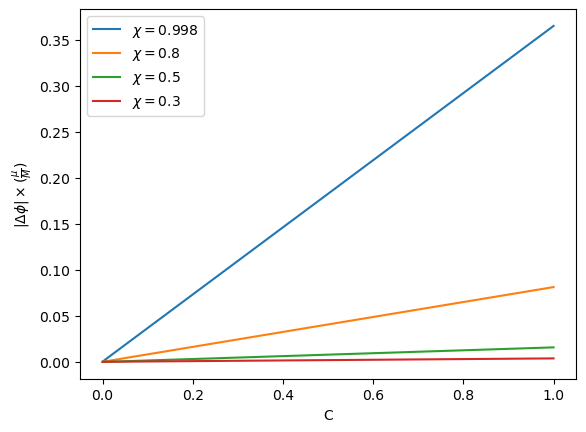

In [19]:
plt.plot(Cvalues,deltphivalues998,label=r'$\chi = 0.998$')
plt.plot(Cvalues,deltphivalues8,label=r'$\chi = 0.8$')
plt.plot(Cvalues,deltphivalues5,label=r'$\chi = 0.5$')
plt.plot(Cvalues,deltphivalues3,label=r'$\chi = 0.3$')

plt.legend()
plt.xlabel("C")
plt.ylabel(r"$|\Delta \phi|\times (\frac{\mu}{M})$")

## A waveform FIG3

the deviation parameter is taken to be 1 compared to 0 as in figures 3 of https://arxiv.org/pdf/1910.07841

In [20]:
path_to_file = os.path.abspath("")
pathmod = path_to_file + "/data/trajectoryC1000000ppm.txt"
pathGR = path_to_file + "/data/trajectory.txt"

trajdata_GR=TrajectoryData(pathGR, dealloc_flag=False)
trajdata_mod=TrajectoryData(pathmod, dealloc_flag=False)

In [21]:
kerr_gen_td_GR = KerrWaveform(trajectory_data=trajdata_GR)
kerr_gen_td_mod = KerrWaveform(trajectory_data=trajdata_mod)

In [22]:
#intrinsic binary
M = 1e6  # primary mass in solar masses
mu = 3e1 # secondary mass in solar masses

#intrinsic orbital
p0 = 10 # initial semi-latus rectum

#more general orbits
e0 = 0.0 # eccentricity is ignored for circular orbits
x0 = 1.0  # inclination is ignored for circular orbits

#orbital phases
Phi_phi0 = 0.2 # initial azimuthal position of the secondary

#more general orbits
Phi_theta0 = 0.0 # ignored for circular orbits
Phi_r0 = 0.0 # ignored for circular orbits

#extrinsic binary parameters
qK = 0.8  # polar angle of Kerr spin angular momentum
phiK = 0.2  # azimuthal angle of Kerr spin angular momentum
qS = 0.3  # polar sky angle
phiS = 0.3  # azimuthal sky angle
dist = 2.0  # distance to source in Gpc

dt = 5.0  # time steps in seconds
T = 1.0  # waveform duration in years

a9=0.9
a7=0.7

injection_paramters7 = [M, mu, a7, p0, e0, x0, 
                       dist, qS, phiS, qK, phiK, 
                       Phi_phi0, Phi_theta0, Phi_r0, 
                       dt, T]

injection_paramters9 = [M, mu, a9, p0, e0, x0, 
                       dist, qS, phiS, qK, phiK, 
                       Phi_phi0, Phi_theta0, Phi_r0, 
                       dt, T]

In [23]:
start = time.time()
h7gr = kerr_gen_td_GR(*injection_paramters7)
h9gr = kerr_gen_td_GR(*injection_paramters9)
end=time.time()
print(end-start)

16.081191778182983


In [24]:
h7mod = kerr_gen_td_mod(*injection_paramters7)
h9mod = kerr_gen_td_mod(*injection_paramters9)

In [25]:
t7gr = np.arange(h7gr.shape[0])*dt/60./60./24.
t7mod = np.arange(h7mod.shape[0])*dt/60./60./24.
print(t7gr[400000])
print(t7mod[400000])

t9gr = np.arange(h9gr.shape[0])*dt/60./60./24.
t9mod = np.arange(h9mod.shape[0])*dt/60./60./24.
print(t7gr[400000])
print(t7mod[400000])

23.14814814814815
23.14814814814815
23.14814814814815
23.14814814814815


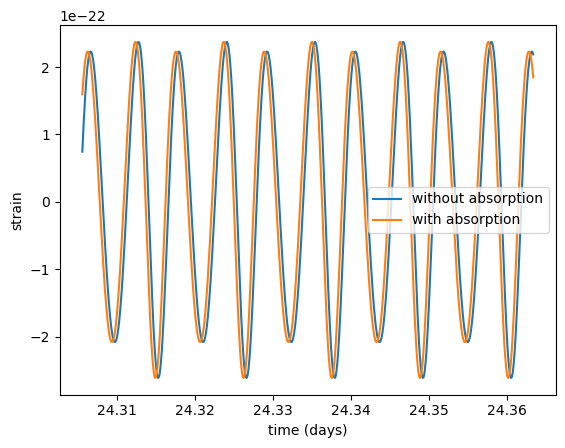

In [26]:
imin=420000
imax=421000
plt.plot(t7gr[imin:imax], h7gr.real[imin:imax],label=r'without absorption')
plt.plot(t7mod[imin:imax], h7mod.real[imin:imax],label=r'with absorption')
plt.xlabel("time (days)")
plt.ylabel("strain")
plt.legend()
plt.show()

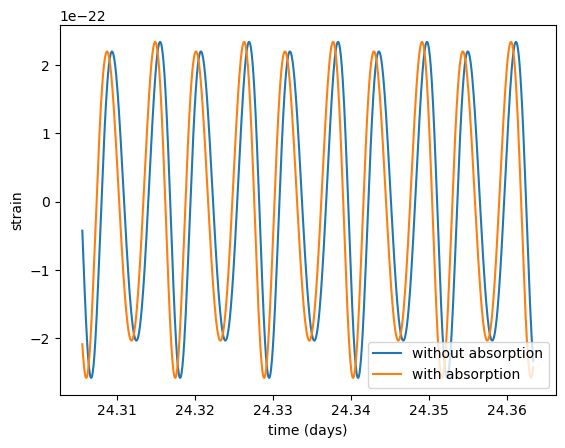

In [27]:
imin=420000
imax=421000
plt.plot(t9gr[imin:imax], h9gr.real[imin:imax],label=r'without absorption')
plt.plot(t9mod[imin:imax], h9mod.real[imin:imax],label=r'with absorption')
plt.xlabel("time (days)")
plt.ylabel("strain")
plt.legend()
plt.show()

## Mismatches FIG4

the deviation parameter is taken to be 1 compared to 0 as in figures 4 of https://arxiv.org/pdf/1910.07841 

In [28]:
#usual setup 

path_to_file = os.path.abspath("")
pathmod = path_to_file + "/data/trajectoryC1000000ppm.txt"
pathGR = path_to_file + "/data/trajectory.txt"

trajdata_GR=TrajectoryData(pathGR, dealloc_flag=False)
trajdata_mod=TrajectoryData(pathmod, dealloc_flag=False)

kerr_gen_td_GR = KerrWaveform(trajectory_data=trajdata_GR)
kerr_gen_td_mod = KerrWaveform(trajectory_data=trajdata_mod)

kerr_gen_fd_GR = KerrFrequencyWaveform(trajectory_data=trajdata_GR)
kerr_gen_fd_mod = KerrFrequencyWaveform(trajectory_data=trajdata_mod)

In [29]:
#intrinsic binary
M = 1e6  # primary mass in solar masses
mu = 3e1 # secondary mass in solar masses

#intrinsic orbital
p0 = 10 # initial semi-latus rectum

#more general orbits
e0 = 0.0 # eccentricity is ignored for circular orbits
x0 = 1.0  # inclination is ignored for circular orbits

#orbital phases
Phi_phi0 = 0.2 # initial azimuthal position of the secondary

#more general orbits
Phi_theta0 = 0.0 # ignored for circular orbits
Phi_r0 = 0.0 # ignored for circular orbits

#extrinsic binary parameters
qK = 0.8  # polar angle of Kerr spin angular momentum
phiK = 0.2  # azimuthal angle of Kerr spin angular momentum
qS = 0.3  # polar sky angle
phiS = 0.3  # azimuthal sky angle
dist = 2.0  # distance to source in Gpc

dt = 5.0  # time steps in seconds
T = 1.0  # waveform duration in years

a998=0.998
a9=0.9
a7=0.7

injection_paramters7 = [M, mu, a7, p0, e0, x0, 
                       dist, qS, phiS, qK, phiK, 
                       Phi_phi0, Phi_theta0, Phi_r0, 
                       dt, T]

injection_paramters9 = [M, mu, a9, p0, e0, x0, 
                       dist, qS, phiS, qK, phiK, 
                       Phi_phi0, Phi_theta0, Phi_r0, 
                       dt, T]

injection_paramters998 = [M, mu, a998, p0, e0, x0, 
                       dist, qS, phiS, qK, phiK, 
                       Phi_phi0, Phi_theta0, Phi_r0, 
                       dt, T]

tdwave7=kerr_gen_td_GR(*injection_paramters7)
tdwave7mod=kerr_gen_td_mod(*injection_paramters7)

tdwave9=kerr_gen_td_GR(*injection_paramters9)
tdwave9mod=kerr_gen_td_mod(*injection_paramters9)

tdwave998=kerr_gen_td_GR(*injection_paramters998)
tdwave998mod=kerr_gen_td_mod(*injection_paramters998)

In [30]:
tdwave7.shape

(6311630,)

In [31]:
val = inner_product(tdwave7, tdwave7, dt=dt, psd="LISASens", psd_kwargs=dict(model="scirdv1", stochastic_params=(YRSID_SI,)))
print(f"Inner product <h1|h2>: {val}")

/home/user496/miniconda3/envs/lisa_env/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/home/user496/miniconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:83: RuntimeWarning: divide by zero encountered in divide
  Sa_a = Sa_a_in * (1.0 + (0.4e-3 / frq) ** 2) * (1.0 + (frq / 8e-3) ** 4)
/home/user496/miniconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:85: RuntimeWarning: divide by zero encountered in power
  Sa_d = Sa_a * (2.0 * np.pi * frq) ** (-4.0)
/home/user496/miniconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:87: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = Sa_d * (2.0 * np.pi * frq / C_SI) ** 2
/home/user496/miniconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:92: RuntimeWarning: divide by zero encountered in divide
  Soms_d = S

Inner product <h1|h2>: 2516.4513592257663


In [32]:
complex_val = inner_product(tdwave7, tdwave7, dt=dt, psd="LISASens", psd_kwargs=dict(model="scirdv1", stochastic_params=(YRSID_SI,)), complex=True)
print(f"Complex inner product <h1|h2>: {complex_val}, phase maximized value: {np.abs(complex_val)}")


Complex inner product <h1|h2>: (2516.4513592257667+8.469650185332515e-17j), phase maximized value: 2516.4513592257667


In [33]:
normalized_val = inner_product(tdwave7, tdwave7, dt=dt, psd="LISASens", psd_kwargs=dict(model="scirdv1", stochastic_params=(YRSID_SI,)), normalize=True)
print(f"Normalized inner product <h1|h2>: {normalized_val}")

Normalized inner product <h1|h2>: 1.0


In [34]:
### following are some mismatches: do more systematically to reproduce plots in paper!

In [35]:
1-inner_product(tdwave7, tdwave7mod, dt=dt, psd="LISASens", psd_kwargs=dict(model="scirdv1"), normalize=True)

0.9864529921300643

In [36]:
1-inner_product(tdwave9, tdwave9mod, dt=dt, psd="LISASens", psd_kwargs=dict(model="scirdv1"), normalize=True)

0.984574669919003

In [37]:
1-inner_product(tdwave998, tdwave998mod, dt=dt, psd="LISASens", psd_kwargs=dict(model="scirdv1"), normalize=True)

0.9849343006086386

## Fisher information matrix

notably absent from https://arxiv.org/pdf/1910.07841 

here approach is to try with lisatools

First import some additional modules

In [ ]:
from few.utils.constants import MTSUN_SI, YRSID_SI, Pi

In [11]:
pathname = "/data/trajectoryCtemp.txt"
Ctest=0
alphanum=2**6+1
chinu=2**6+1
generate_mod_trajectories(Ctest,pathname, chi_sample_num = chinu, alpha_sample_num = alphanum)
#generate_mod_trajectories(Ctest,pathname, chi_sample_num = 2**8 + 1, alpha_sample_num = 2**8 + 1)
#generate_mod_trajectories(Ctest,pathname)

Generating time, phase, and frequency evolution
/home/user496/Documents/work/post-PHD_2/bhpwave_Nasipak_sprint/bhpwave/data/trajectoryCtemp.txt
Saving trajectory data to /home/user496/Documents/work/post-PHD_2/bhpwave_Nasipak_sprint/bhpwave/data/trajectoryCtemp.txt


In [30]:
pathname = f"/data/trajectoryCtemp{10**6*Ctest:.0f}ppm.txt"
print(pathname)

/data/trajectoryCtemp1ppm.txt


In [81]:
alphqnum=2**8+1
chinum=2**8+1
path_to_file = os.path.abspath("")

def waveform_model(C,M, mu, a, p0, e0, x0, 
                       dist, qS, phiS, qK, phiK, 
                       Phi_phi0, Phi_theta0, Phi_r0, 
                       dt, T):
    pathname =  f"/data/trajectoryCtemp{10**6*C:.0f}ppm.txt"
    generate_mod_trajectories(C,pathname, chi_sample_num = chinum, alpha_sample_num = alphqnum)
    pathmod = path_to_file + "/data/trajectoryCtemp.txt"
    #pathGR = path_to_file + "/data/trajectory.txt"
    #trajdata_GR=TrajectoryData(pathGR, dealloc_flag=False)
    trajdata_mod=TrajectoryData(pathmod, dealloc_flag=False)
    #kerr_gen_td_GR = KerrWaveform(trajectory_data=trajdata_GR)
    kerr_gen_td_mod = KerrWaveform(trajectory_data=trajdata_mod)
    #kerr_gen_fd_GR = KerrFrequencyWaveform(trajectory_data=trajdata_GR)
    #kerr_gen_fd_mod = KerrFrequencyWaveform(trajectory_data=trajdata_mod)
    injection_paramters = [M, mu, a, p0, e0, x0, 
                       dist, qS, phiS, qK, phiK, 
                       Phi_phi0, Phi_theta0, Phi_r0, 
                       dt, T]
    return kerr_gen_td_mod(injection_paramters)

#more general orbits
e0 = 0.0 # eccentricity is ignored for circular orbits
x0 = 1.0  # inclination is ignored for circular orbits

#orbital phases
Phi_phi0 = 0.2 # initial azimuthal position of the secondary

#more general orbits
Phi_theta0 = 0.0 # ignored for circular orbits
Phi_r0 = 0.0 # ignored for circular orbits

#extrinsic binary parameters
qK = 0.8  # polar angle of Kerr spin angular momentum
phiK = 0.2  # azimuthal angle of Kerr spin angular momentum
qS = 0.3  # polar sky angle
phiS = 0.3  # azimuthal sky angle
dist = 2.0  # distance to source in Gpc

dt = 5.0  # time steps in seconds
T = 1.0  # waveform duration in years


def waveform_model_red(C,M, mu, a, p0):
    testpathname = f"/data/trajectoryCtemp{10**6*C:.0f}ppm.txt"
    pathmod = path_to_file + testpathname 
    if not os.path.isfile(pathmod):
        generate_mod_trajectories(C,testpathname, chi_sample_num = chinum, alpha_sample_num = alphqnum)
    #pathGR = path_to_file + "/data/trajectory.txt"
    #trajdata_GR=TrajectoryData(pathGR, dealloc_flag=False)
    trajdata_mod=TrajectoryData(pathmod, dealloc_flag=False)
    #kerr_gen_td_GR = KerrWaveform(trajectory_data=trajdata_GR)
    kerr_gen_td_mod = KerrWaveform(trajectory_data=trajdata_mod)
    #kerr_gen_fd_GR = KerrFrequencyWaveform(trajectory_data=trajdata_GR)
    #kerr_gen_fd_mod = KerrFrequencyWaveform(trajectory_data=trajdata_mod)
    injection_paramters = [M, mu, a, p0, e0, x0, 
                       dist, qS, phiS, qK, phiK, 
                       Phi_phi0, Phi_theta0, Phi_r0, 
                       dt, T]   
    return kerr_gen_td_mod(*injection_paramters)

fn = np.logspace(-8, 0, 100000)
def waveform_model_fd_red(C,M, mu, a, p0):
    testpathname = f"/data/trajectoryCtemp{10**6*C:.0f}ppm.txt"
    pathmod = path_to_file + testpathname 
    if not os.path.isfile(pathmod):
        generate_mod_trajectories(C,testpathname, chi_sample_num = chinum, alpha_sample_num = alphqnum)
    #pathGR = path_to_file + "/data/trajectory.txt"
    #trajdata_GR=TrajectoryData(pathGR, dealloc_flag=False)
    trajdata_mod=TrajectoryData(pathmod, dealloc_flag=False)
    #kerr_gen_td_GR = KerrWaveform(trajectory_data=trajdata_GR)
    kerr_gen_fd_mod = KerrFrequencyWaveform(trajectory_data=trajdata_mod)
    #kerr_gen_fd_GR = KerrFrequencyWaveform(trajectory_data=trajdata_GR)
    #kerr_gen_fd_mod = KerrFrequencyWaveform(trajectory_data=trajdata_mod)
    injection_paramters = [M, mu, a, p0, e0, x0, 
                       dist, qS, phiS, qK, phiK, 
                       Phi_phi0, Phi_theta0, Phi_r0, 
                       dt, T]   
    return kerr_gen_fd_mod(*injection_paramters,frequencies=fn)

In [82]:
Cref=0.1
aref=0.9
#intrinsic binary
M = 1e6  # primary mass in solar masses
mu = 3e1 # secondary mass in solar masses

#intrinsic orbital
p0 = 10 # initial semi-latus rectum


refparams = [Cref, M, mu, aref, p0, e0, x0, 
                       dist, qS, phiS, qK, phiK, 
                       Phi_phi0, Phi_theta0, Phi_r0, 
                       dt, T]

refparamsred = [Cref, M, mu, aref, p0]

refwave=waveform_model_red(*refparamsred)
refwavefd=waveform_model_fd_red(*refparamsred)

In [83]:
rho2= inner_product(refwave, refwave, dt=dt, psd="LISASens", psd_kwargs=dict(model="scirdv1", stochastic_params=(YRSID_SI,)))
print(rho2)

/home/user496/miniconda3/envs/lisa_env/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/home/user496/miniconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:83: RuntimeWarning: divide by zero encountered in divide
  Sa_a = Sa_a_in * (1.0 + (0.4e-3 / frq) ** 2) * (1.0 + (frq / 8e-3) ** 4)
/home/user496/miniconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:85: RuntimeWarning: divide by zero encountered in power
  Sa_d = Sa_a * (2.0 * np.pi * frq) ** (-4.0)
/home/user496/miniconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:87: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = Sa_d * (2.0 * np.pi * frq / C_SI) ** 2
/home/user496/miniconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:92: RuntimeWarning: divide by zero encountered in divide
  Soms_d = S

1057.2509593349985


/home/user496/miniconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/stochastic.py:177: RuntimeWarning: divide by zero encountered in power
  * (f ** (-7.0 / 3.0))


In [88]:
rho2= inner_product(refwavefd, refwavefd, f_arr=fn, psd="LISASens", psd_kwargs=dict(model="scirdv1"))
print(rho2)

5688.545151195498


In [89]:
eps = 10**(-6)
FIM=info_matrix(eps, waveform_model_red, refparamsred,inner_product_kwargs={'dt':dt,'psd':"LISASens",'psd_kwargs':dict(model="scirdv1")})

In [94]:
eps = 10**(-6)
FIM=info_matrix(eps, waveform_model_fd_red, refparamsred,inner_product_kwargs={'f_arr':fn})

In [97]:
cov=np.linalg.inv(FIM)

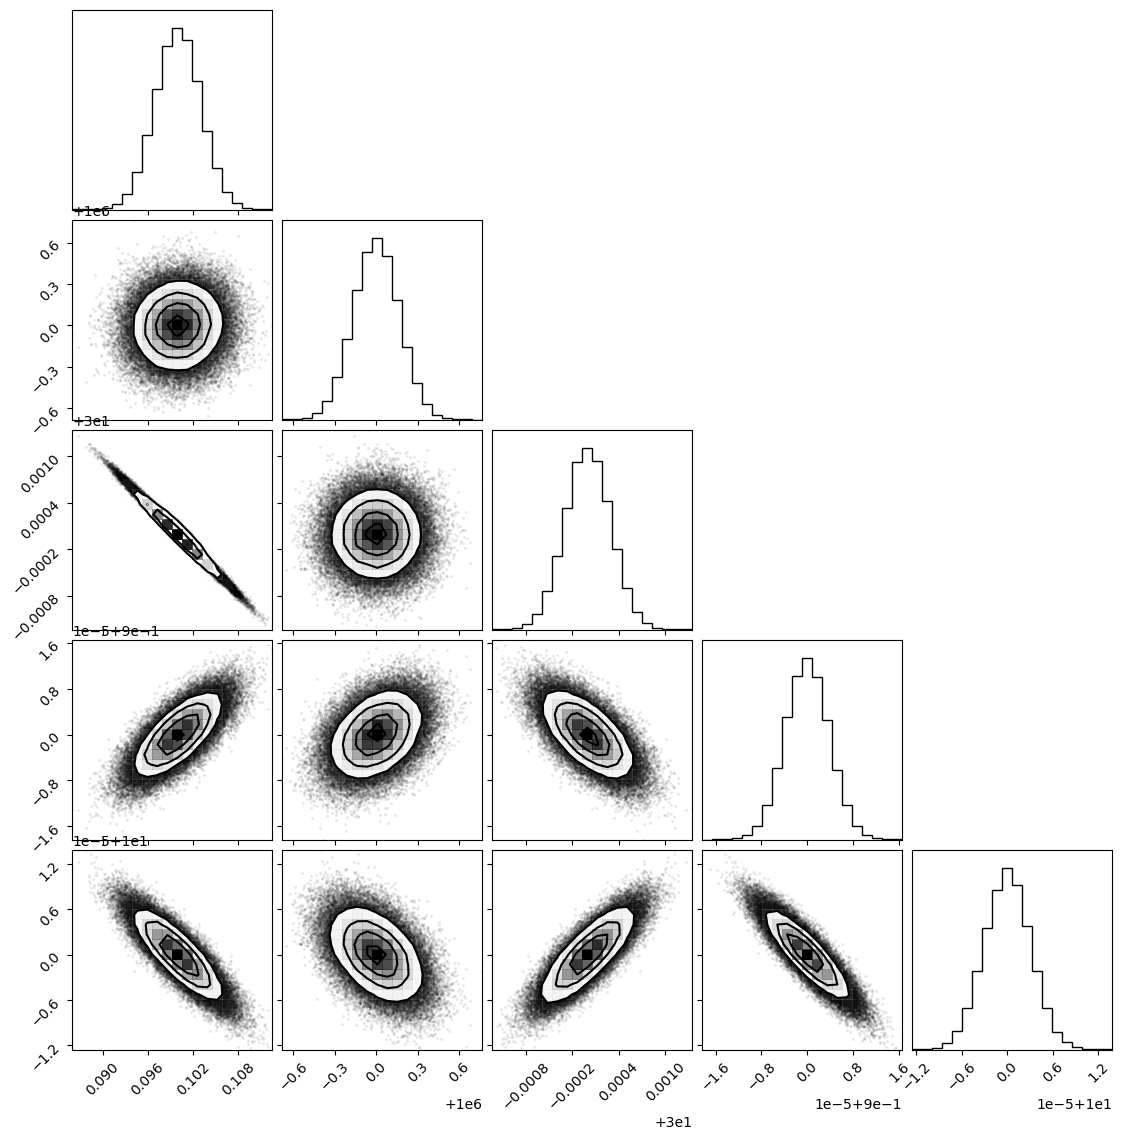

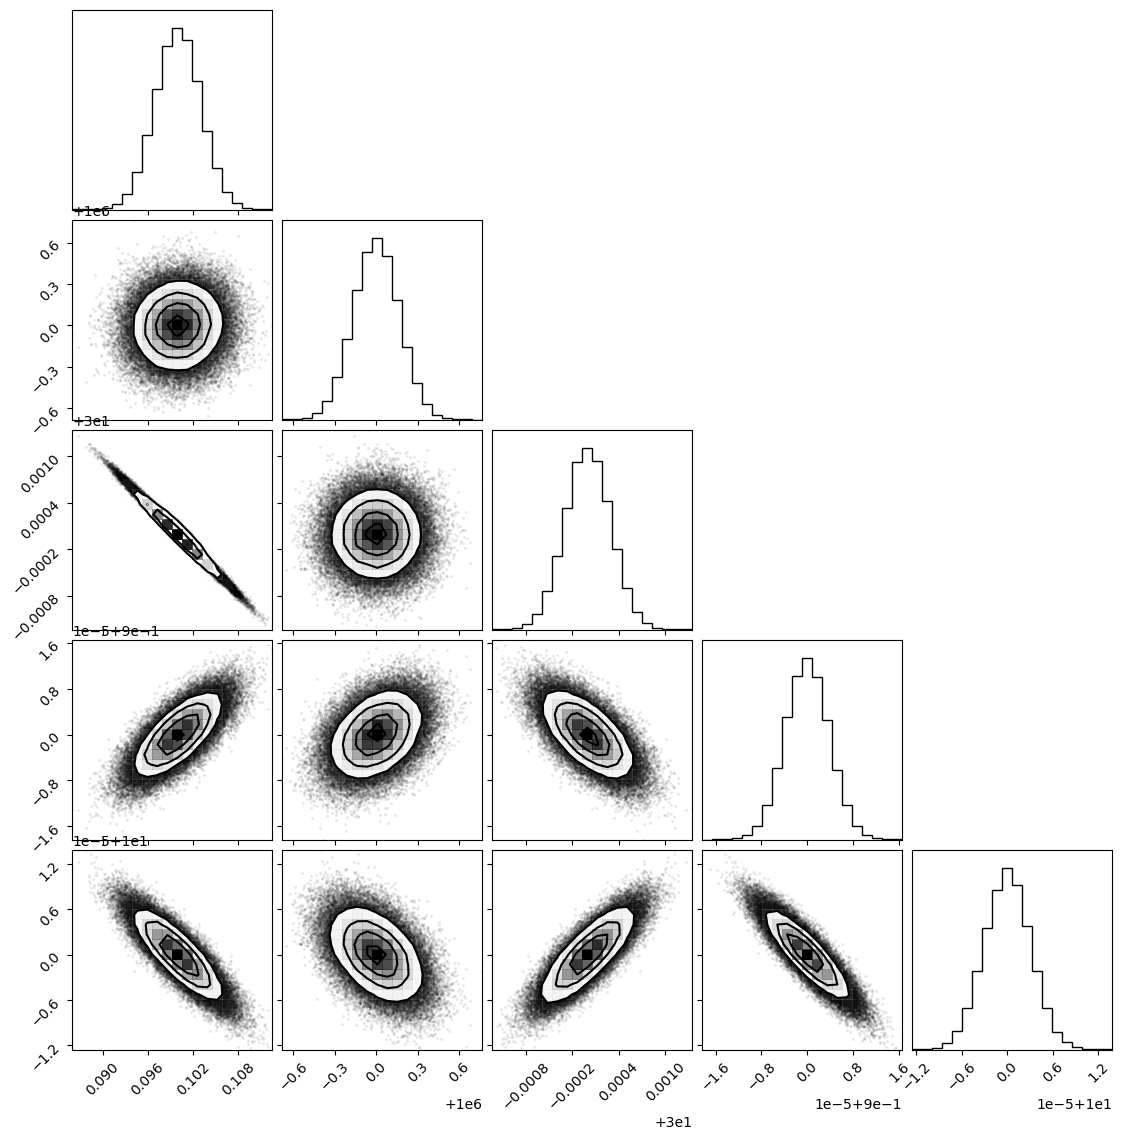

In [98]:
[Cref, M, mu, aref, p0]
plot_covariance_corner(refparamsred,cov,nsamp=100000,kwargs={'labels':['C', 'M',r'$\mu$',r'$\chi$',r'$r_0$']})

## some extra function tries done at some point to get familiar with the code



In [ ]:
fn = np.logspace(-5, -1, 10000)
fdwave7=kerr_gen_fd_GR(*injection_paramters7,frequencies=fn)
fdwave7mod=kerr_gen_fd_mod(*injection_paramters7,frequencies=fn)

In [ ]:
print(len(fdwave7[0]))
print(len(fn))
len(fdwave7[0][fn > 1e-3])

In [ ]:
fn = np.logspace(-5, -1, 10000)
Sn_char_strain = get_sensitivity(fn, sens_fn="LISASens",model=scirdv1, return_type="char_strain")
plt.loglog(fn[fn > 1e-3][::2000], np.abs(fdwave7[0])[fn > 1e-3][::2000], label = 'FD')
plt.loglog(fn[fn > 1e-3][::2000], np.abs(fdwave7mod[0])[fn > 1e-3][::2000], label = 'FD mod')
plt.loglog(fn, Sn_char_strain)
plt.ylabel("$|\\tilde{h}_+(f)|$")
plt.xlabel("$f$ (Hz)")
plt.legend()

plt.show()

In [ ]:
sens_mat2 = AE1SensitivityMatrix(fn, model=lisa_models.scirdv1)

sens_mat2.loglog()

In [ ]:
h7mod = kerr_gen_td_mod(*injection_paramters7)
h9mod = kerr_gen_td_mod(*injection_paramters9)

t7gr = np.arange(h7gr.shape[0])*dt/60./60./24.
t7mod = np.arange(h7mod.shape[0])*dt/60./60./24.

t9gr = np.arange(h9gr.shape[0])*dt/60./60./24.
t9mod = np.arange(h9mod.shape[0])*dt/60./60./24.

inspiral_gen_GR = InspiralGenerator(trajectory_data=trajdata_GR)
inspiral_gen_mod = InspiralGenerator(trajectory_data=trajdata_mod)
    
insmod=inspiral_gen_mod(M,mu,a,p0,dt,T)